# Exploratory Data Analysis

In [ ]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
#calculating z scores

df = pd.read_csv("cleandata.csv")

df['z_salary_country'] = df.groupby('workCountry')['annualSalary'].transform(lambda x: (x - x.mean()) / x.std())
sns.set(style="whitegrid")

## comparing which feature impacts salary the most within a country 


--- USA ---


/var/folders/1n/sz70yg7d6lzgdc21pyk4l_dh0000gn/T/ipykernel_99548/1063421224.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clip['overallExpYears'] = df_clip['overallProExp'].map(exp_map)


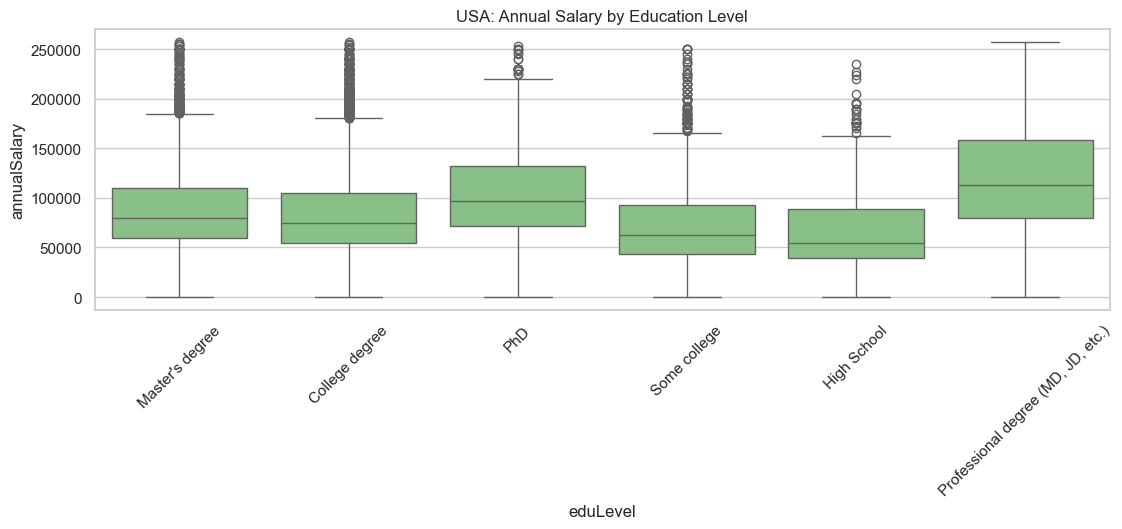

/var/folders/1n/sz70yg7d6lzgdc21pyk4l_dh0000gn/T/ipykernel_99548/1063421224.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clip['exp_bin'] = pd.cut(df_clip['overallExpYears'], bins=[0, 5, 10, 15, 20, 30, 50])


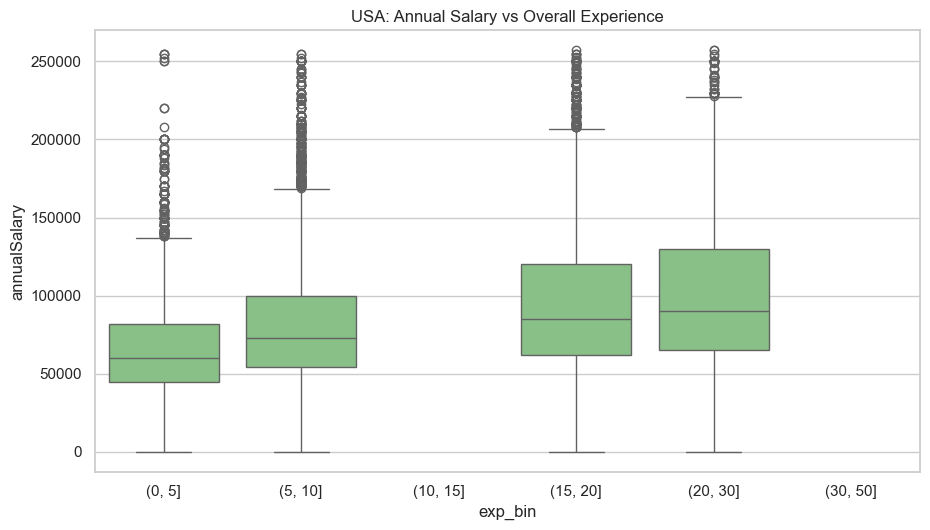

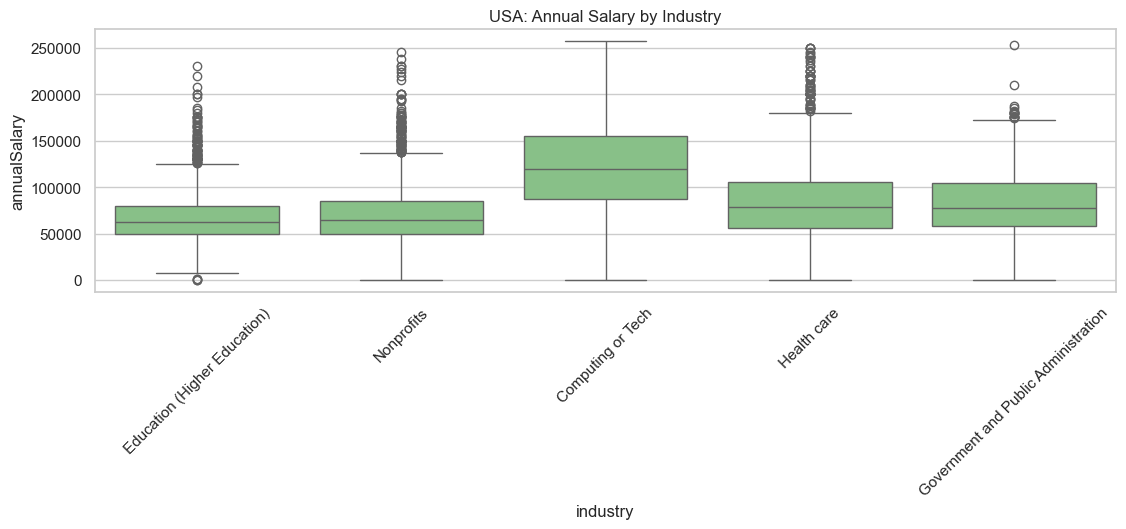

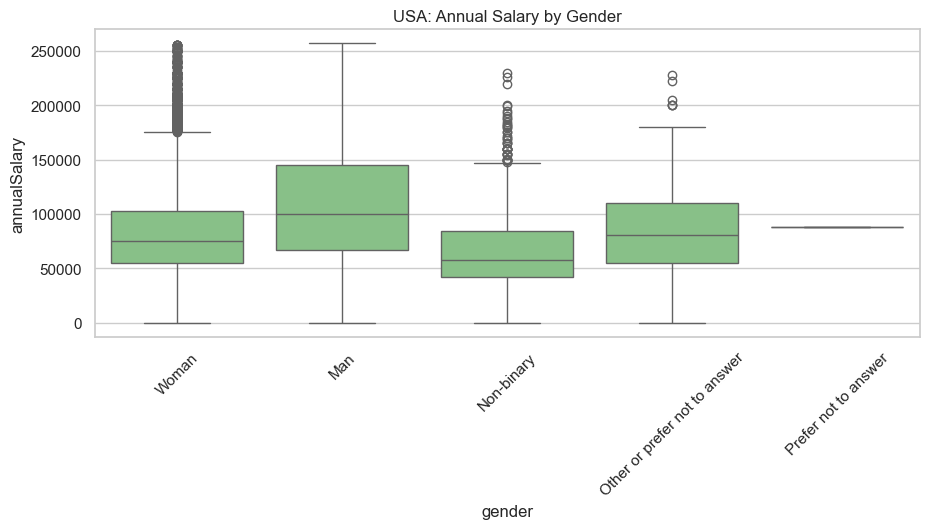

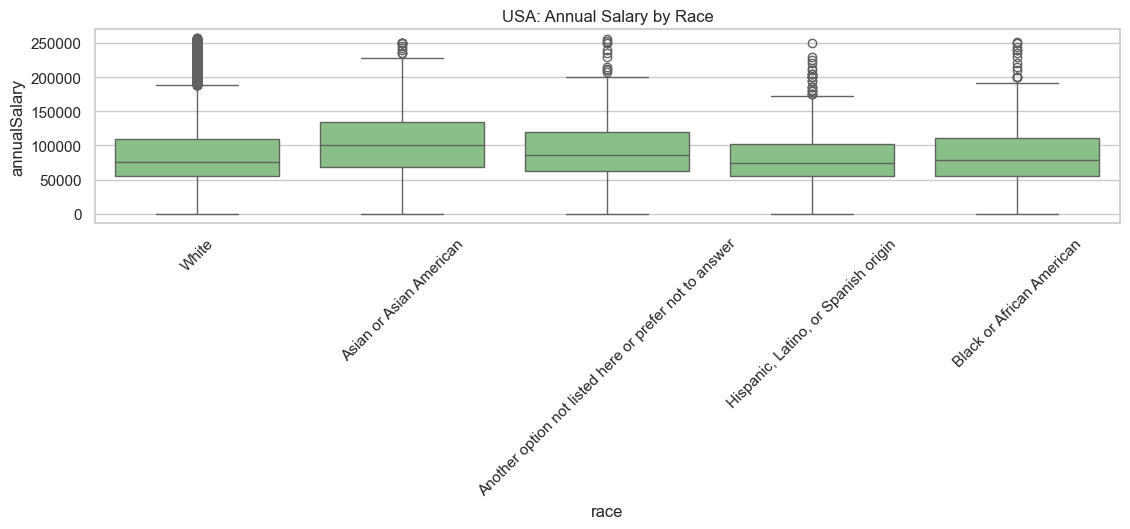


--- CANADA ---


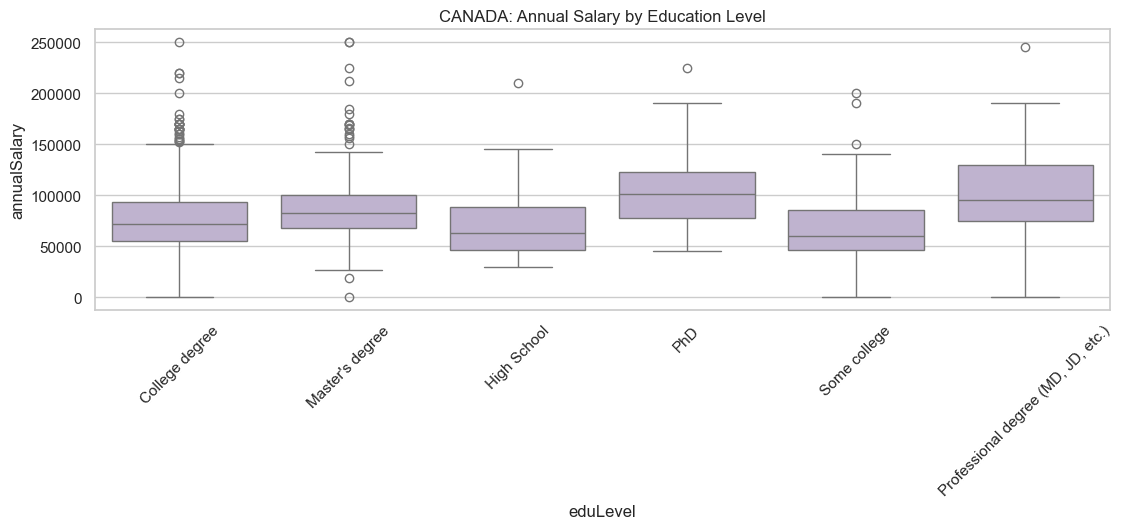

/var/folders/1n/sz70yg7d6lzgdc21pyk4l_dh0000gn/T/ipykernel_99548/1063421224.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clip['exp_bin'] = pd.cut(df_clip['overallExpYears'], bins=[0, 5, 10, 15, 20, 30, 50])


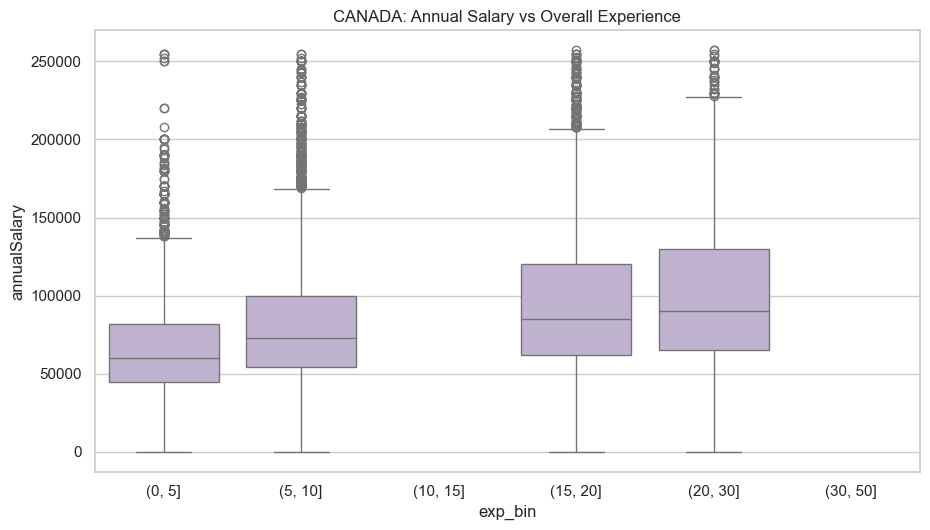

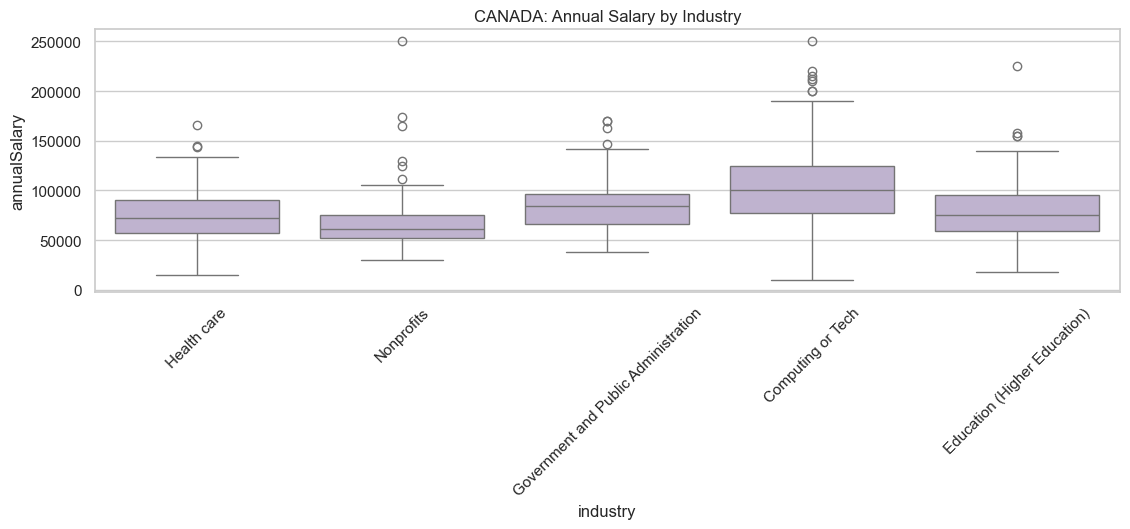

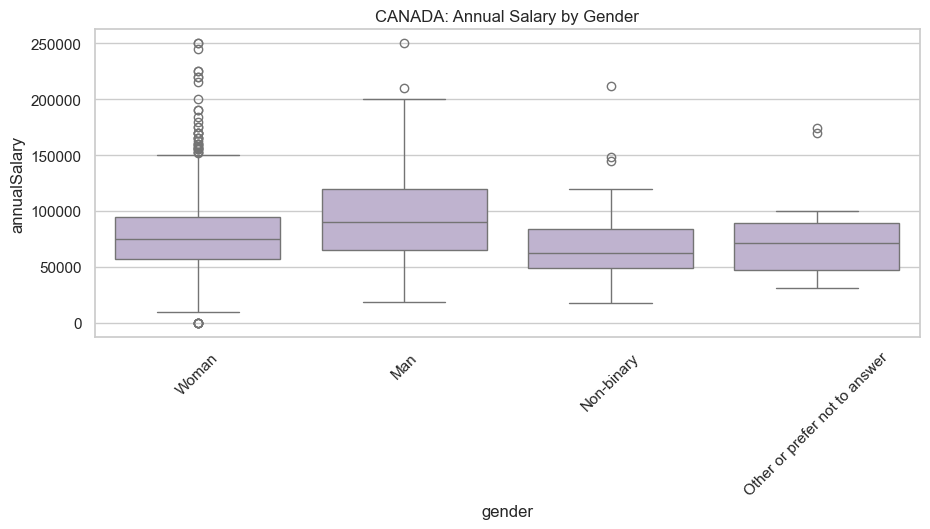

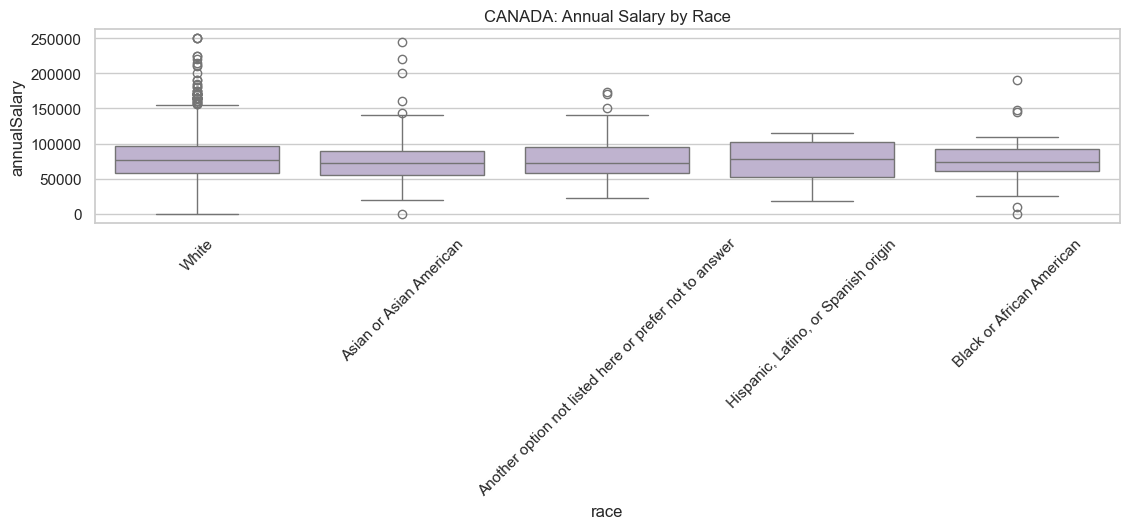


--- UK ---


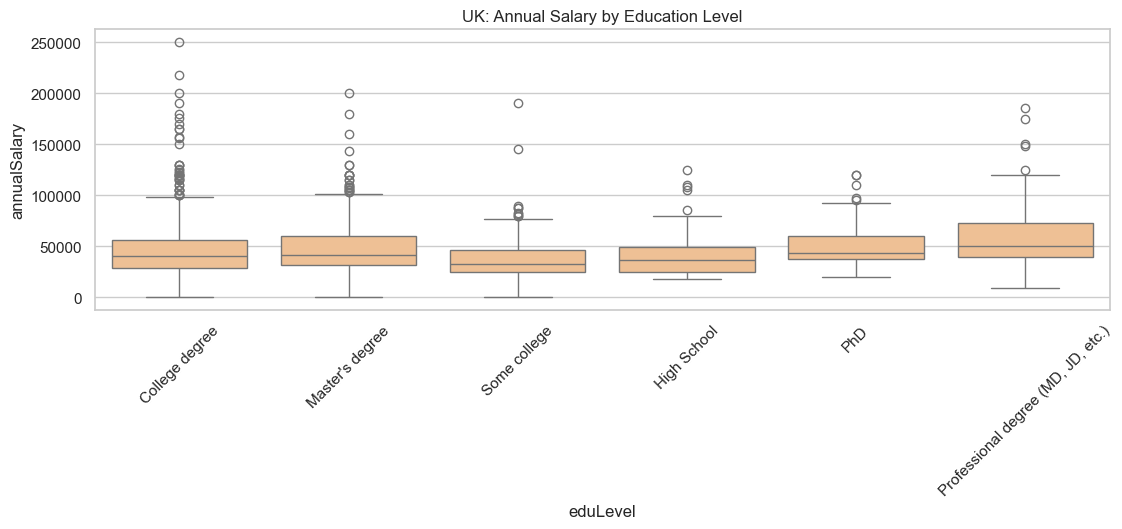

/var/folders/1n/sz70yg7d6lzgdc21pyk4l_dh0000gn/T/ipykernel_99548/1063421224.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clip['exp_bin'] = pd.cut(df_clip['overallExpYears'], bins=[0, 5, 10, 15, 20, 30, 50])


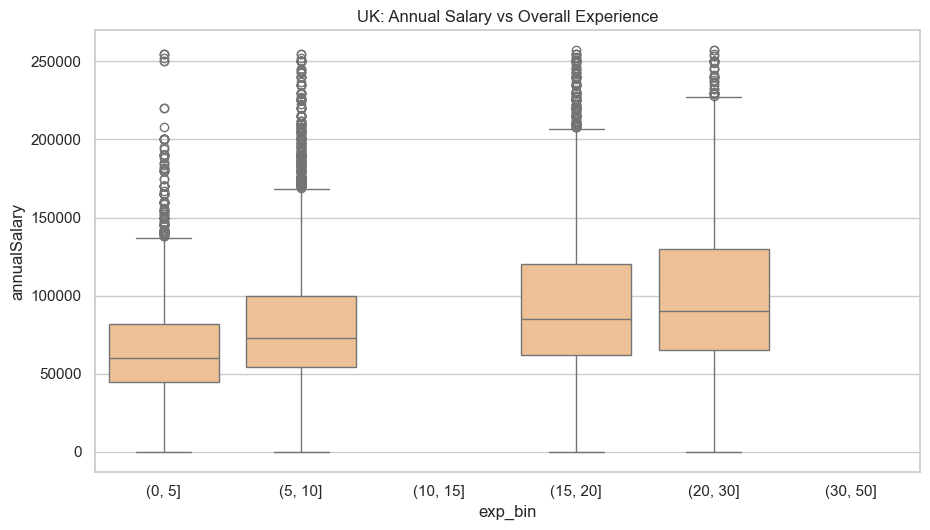

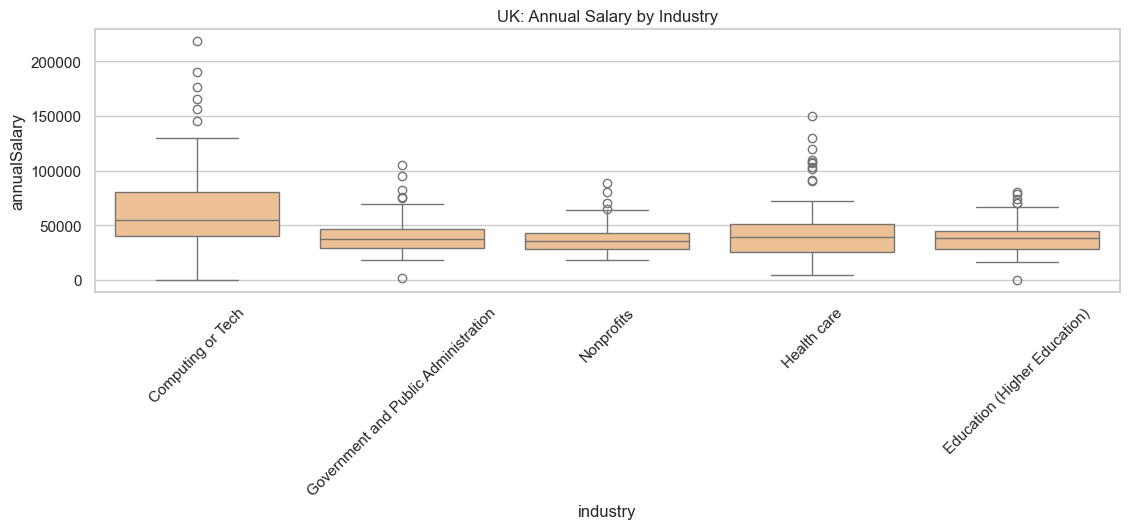

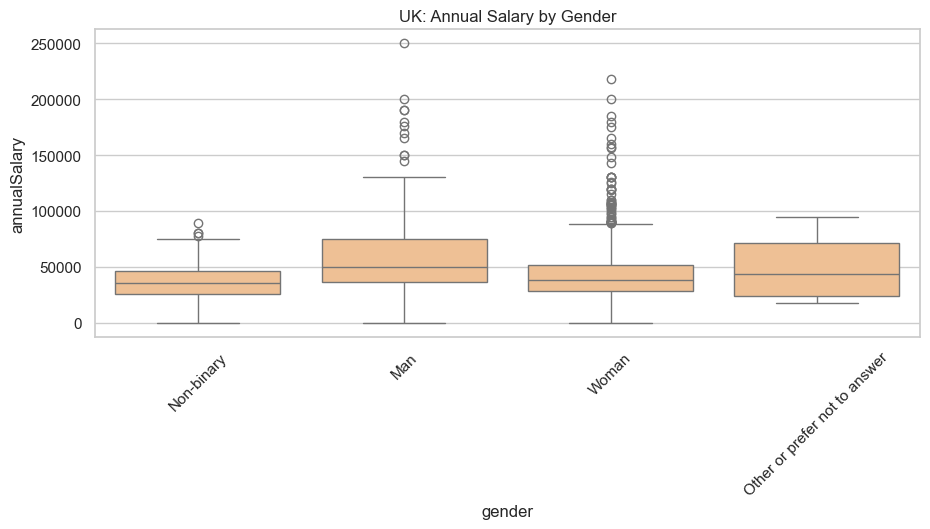

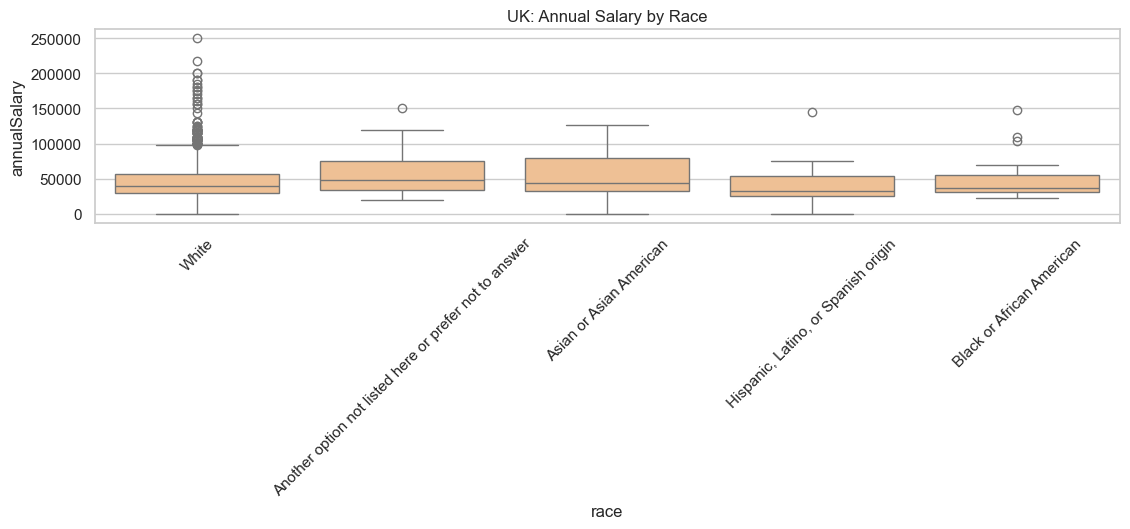

In [ ]:
# keeping only top 99% of data oto prevent outliers from skewing graphs
salary_cap = df['annualSalary'].quantile(0.99)
df_clip = df[df['annualSalary'] < salary_cap]

# binning experience
exp_map = {
    '0-1': 0.5, '2-4': 3, '5-7': 6, '8-10': 9,
    '11-20': 15.5, '21-30': 25.5, '30+': 35
}
df_clip['overallExpYears'] = df_clip['overallProExp'].map(exp_map)

# top 5 industries and races in datset
top_industries = df_clip['industry'].value_counts().head(5).index
top_races = df_clip['race'].value_counts().head(5).index

colors = plt.cm.Accent.colors
color_map = {
    'USA': colors[0],
    'CANADA': colors[1],
    'UK': colors[2],
}

for country in ['USA', 'CANADA', 'UK']:
    df_country = df_clip[df_clip['workCountry'] == country]
    print(f"\n--- {country} ---")
    plt.rcParams['font.size'] = 300
    # education
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_country, x='eduLevel', y='annualSalary', color=color_map[country])
    plt.title(f"{country}: Annual Salary by Education Level")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # experience 
    plt.figure(figsize=(10, 6))
    df_clip['exp_bin'] = pd.cut(df_clip['overallExpYears'], bins=[0, 5, 10, 15, 20, 30, 50])
    sns.boxplot(data=df_clip[df_clip['workCountry'] == 'USA'], x='exp_bin', y='annualSalary', color=color_map[country])

    plt.title(f"{country}: Annual Salary vs Overall Experience")
    plt.tight_layout()
    plt.show()

    # industry (top 5) 
    df_industry = df_country[df_country['industry'].isin(top_industries)]
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_industry, x='industry', y='annualSalary', color=color_map[country])
    plt.title(f"{country}: Annual Salary by Industry")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # gender
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_country, x='gender', y='annualSalary', color=color_map[country])
    plt.title(f"{country}: Annual Salary by Gender")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # race (top 5)
    df_race = df_country[df_country['race'].isin(top_races)]
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_race, x='race', y='annualSalary', color=color_map[country])
    plt.title(f"{country}: Annual Salary by Race")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## comparing which feature impacts salary the most across countries using Z-scores

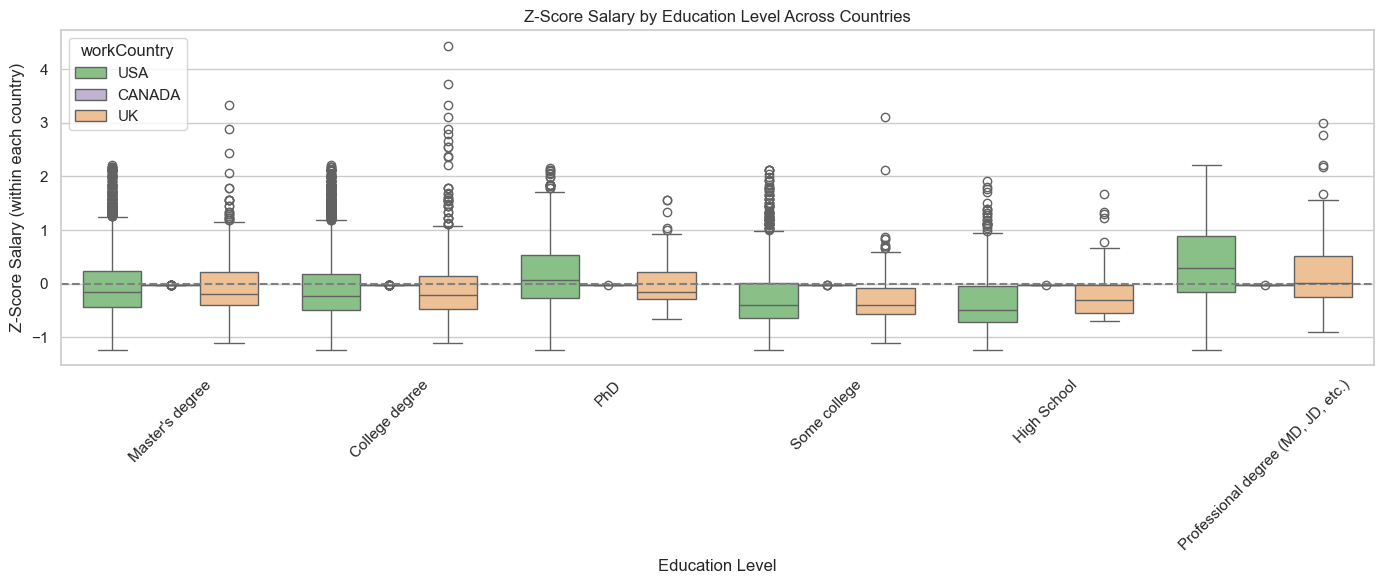

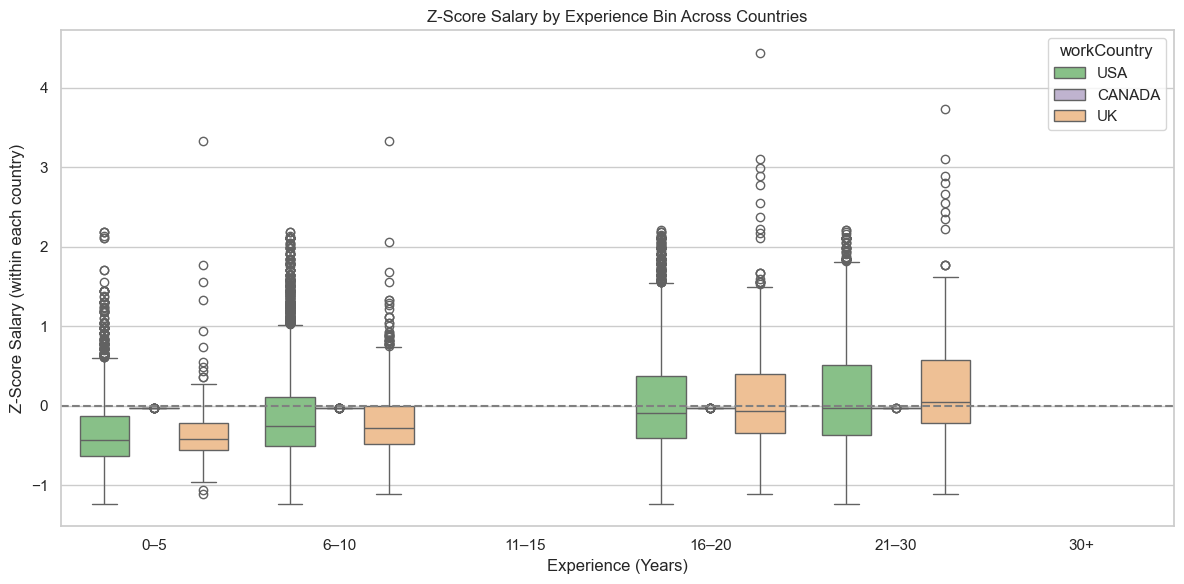

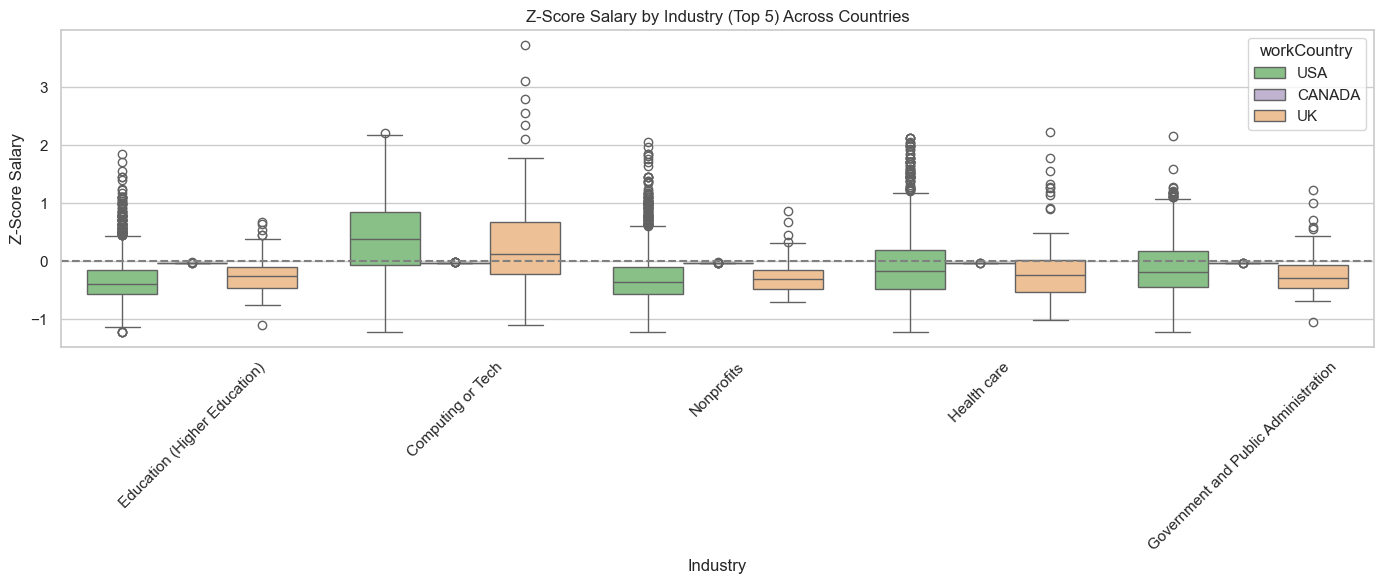

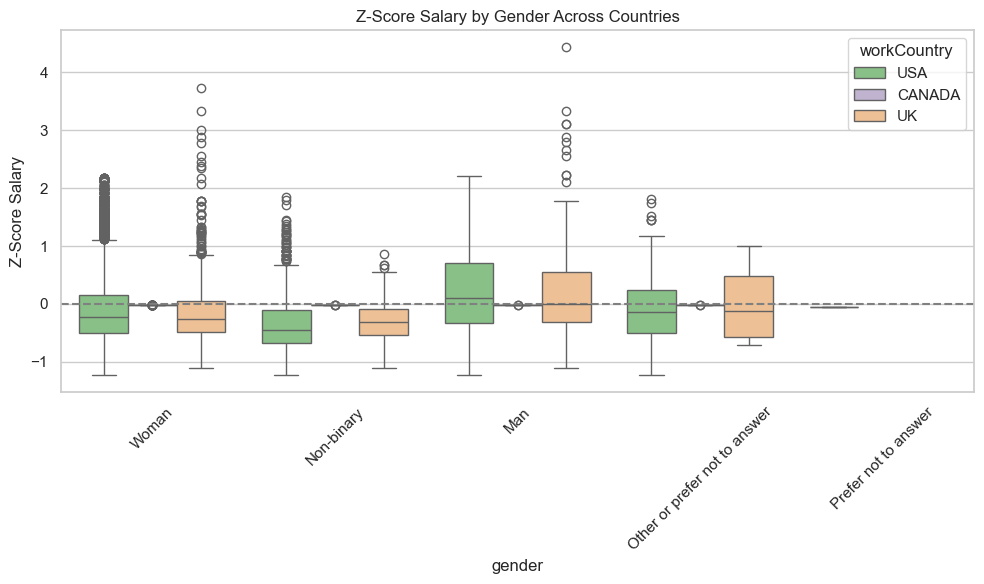

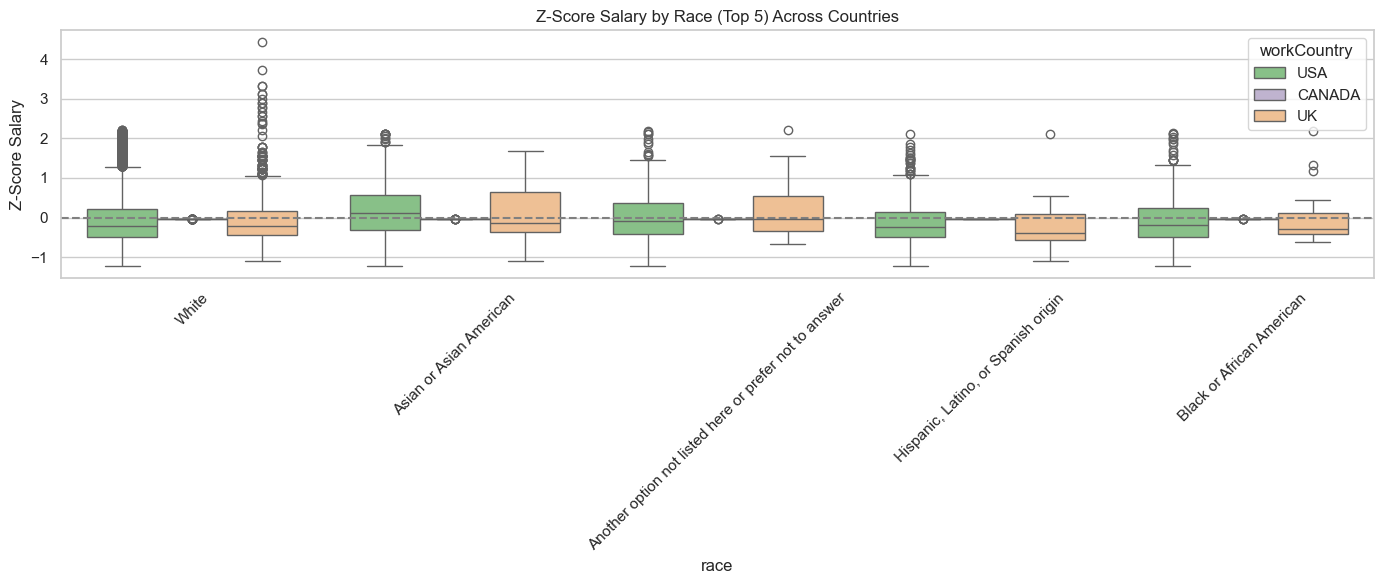

In [ ]:


# calculating zscores by country
df['z_salary_country'] = df.groupby('workCountry')['annualSalary'].transform(
    lambda x: (x - x.mean()) / x.std()
)

#more cleaning: only including top 99 percentile of data so outliers dont skew our graphs
salary_cap = df['annualSalary'].quantile(0.99)
df_clip = df[df['annualSalary'] < salary_cap].copy()

exp_map = {
    '0-1': 0.5, '2-4': 3, '5-7': 6, '8-10': 9,
    '11-20': 15.5, '21-30': 25.5, '30+': 35
}
df_clip['overallExpYears'] = df_clip['overallProExp'].map(exp_map)
top_industries = df_clip['industry'].value_counts().head(5).index
top_races = df_clip['race'].value_counts().head(5).index


colors = plt.cm.Accent.colors
color_map = {
    'USA': colors[0],
    'CANADA': colors[1],
    'UK': colors[2],
}
order = ['USA', 'CANADA', 'UK']
palette = [color_map[c] for c in order]

#education
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clip, x='eduLevel', y='z_salary_country', hue='workCountry', hue_order=order, palette=palette)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Z-Score Salary by Education Level Across Countries")
plt.ylabel("Z-Score Salary (within each country)")
plt.xlabel("Education Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#experience 

#binned experience groups
df_clip['exp_bin'] = pd.cut(
    df_clip['overallExpYears'],
    bins=[0, 5, 10, 15, 20, 30, 50],
    labels=['0–5', '6–10', '11–15', '16–20', '21–30', '30+']
)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_clip,
    x='exp_bin',
    y='z_salary_country',
    hue='workCountry',
    hue_order=order,
    palette=palette
)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Z-Score Salary by Experience Bin Across Countries")
plt.xlabel("Experience (Years)")
plt.ylabel("Z-Score Salary (within each country)")
plt.tight_layout()
plt.show()


# industry 
df_ind = df_clip[df_clip['industry'].isin(top_industries)]
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_ind, x='industry', y='z_salary_country', hue='workCountry', hue_order=order, palette=palette)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Z-Score Salary by Industry (Top 5) Across Countries")
plt.ylabel("Z-Score Salary")
plt.xlabel("Industry")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# gender 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clip, x='gender', y='z_salary_country', hue='workCountry', hue_order=order, palette=palette)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Z-Score Salary by Gender Across Countries")
plt.ylabel("Z-Score Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# race 
df_race = df_clip[df_clip['race'].isin(top_races)]
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_race, x='race', y='z_salary_country', hue='workCountry', hue_order=order, palette=palette)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Z-Score Salary by Race (Top 5) Across Countries")
plt.ylabel("Z-Score Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





## correlation heatmaps 

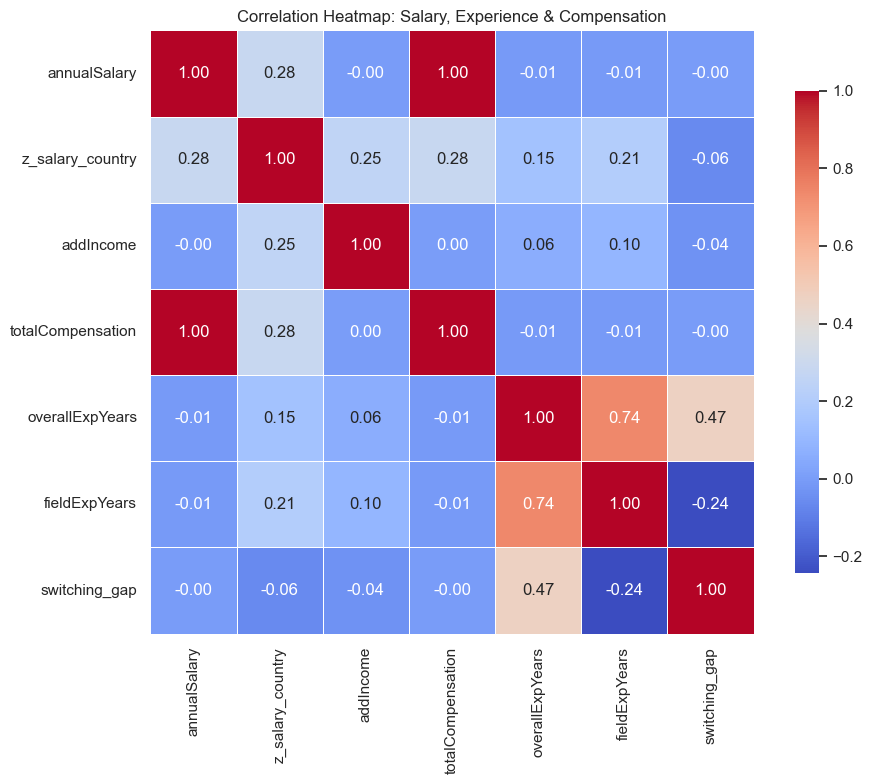

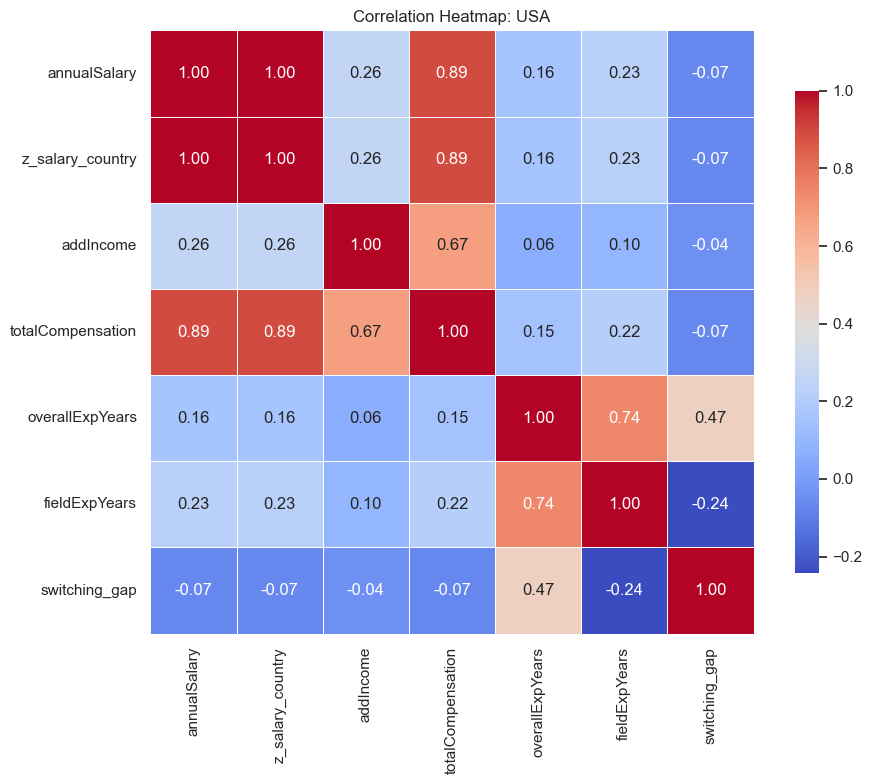

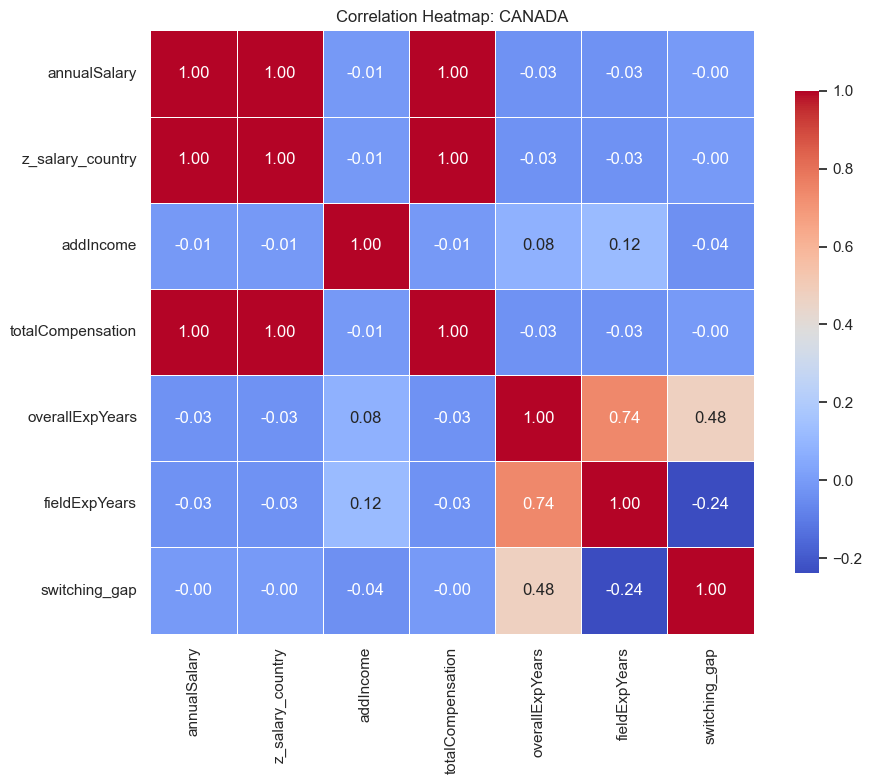

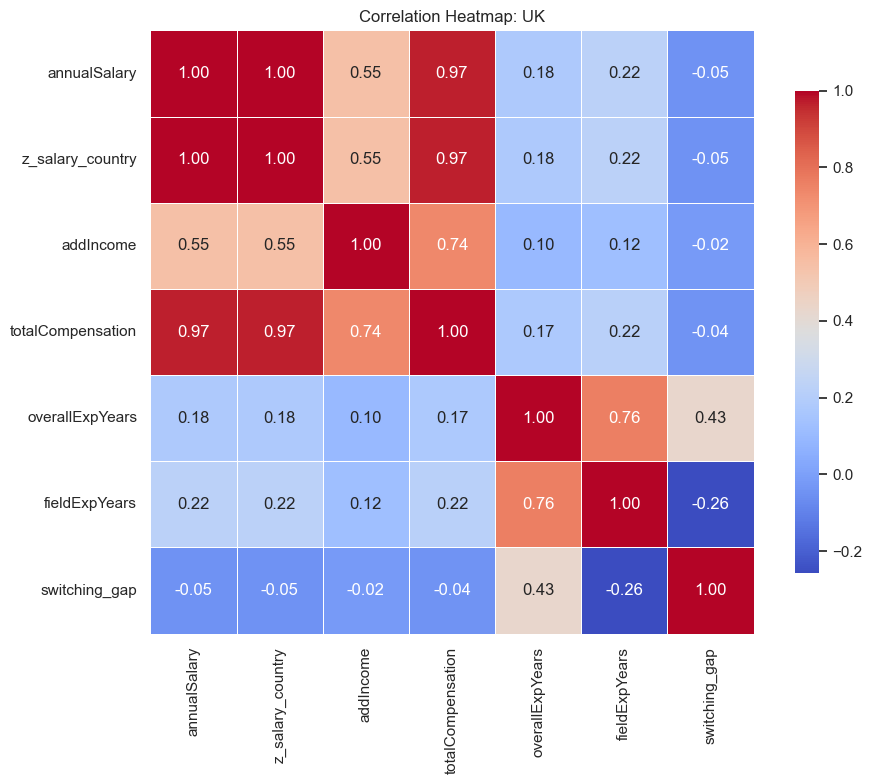

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure derived columns exist
df['overallExpYears'] = df['overallProExp'].map({
    '0-1': 0.5, '2-4': 3, '5-7': 6, '8-10': 9,
    '11-20': 15.5, '21-30': 25.5, '30+': 35
})
df['fieldExpYears'] = df['fieldExp'].map({
    '0-1': 0.5, '2-4': 3, '5-7': 6, '8-10': 9,
    '11-20': 15.5, '21-30': 25.5, '30+': 35
})
df['switching_gap'] = df['overallExpYears'] - df['fieldExpYears']

# Compute z-score salary per country
df['z_salary_country'] = df.groupby('workCountry')['annualSalary'].transform(
    lambda x: (x - x.mean()) / x.std()
)

# Columns to use
corr_cols = [
    'annualSalary',
    'z_salary_country',
    'addIncome',
    'totalCompensation',
    'overallExpYears',
    'fieldExpYears',
    'switching_gap'
]

# Drop rows with any NaNs in selected columns
df_corr = df[corr_cols].dropna()

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap: Salary, Experience & Compensation")
plt.tight_layout()
plt.show()

for country in ['USA', 'CANADA', 'UK']:
    df_country = df[df['workCountry'] == country].copy()
    df_country['overallExpYears'] = df_country['overallProExp'].map(exp_map)
    df_country['fieldExpYears'] = df_country['fieldExp'].map(exp_map)
    df_country['switching_gap'] = df_country['overallExpYears'] - df_country['fieldExpYears']
    df_country['z_salary_country'] = (df_country['annualSalary'] - df_country['annualSalary'].mean()) / df_country['annualSalary'].std()

    df_country_clean = df_country[corr_cols].dropna()

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        df_country_clean.corr(),
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        square=True,
        linewidths=0.5,
        cbar_kws={'shrink': 0.8}
    )
    plt.title(f"Correlation Heatmap: {country}")
    plt.tight_layout()
    plt.show()



<Axes: xlabel='eduLevel', ylabel='annualSalary'>

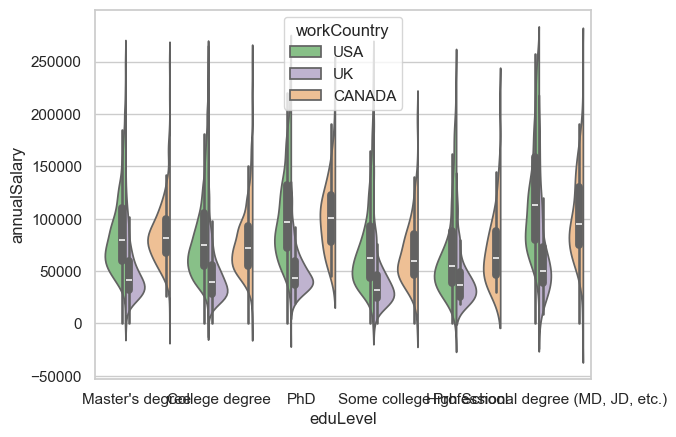

In [91]:
#salary distrubtuo by education; density of where most salaries fall

sns.violinplot(
    data=df_clip,
    x='eduLevel',
    y='annualSalary',
    hue='workCountry',
    split=True,
    palette=palette
)
